Travail rendu par :
* Imad Eddine DJEKOUNE 181831089663
* Mohamed Amine SOUIDI 181831044438 

# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

In [ ]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

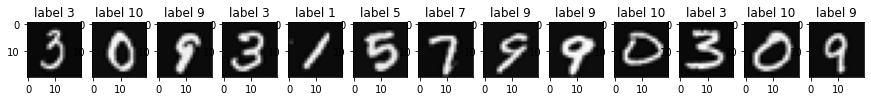

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0]) #pich a random line from the dataset 
    a = X[c,:].reshape((20, 20)) #shape of one number in the image 
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

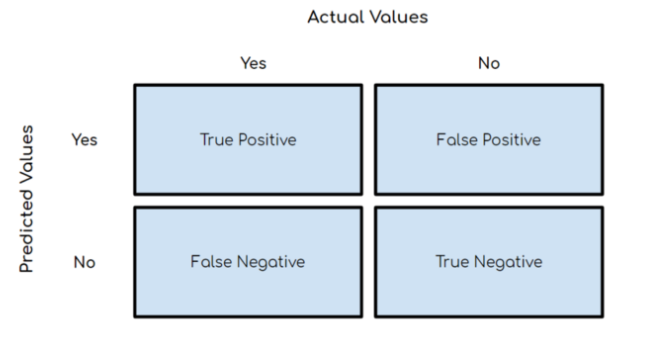- Matrice de conusion

In [ ]:
# Scratch Version 
def MatriceDeConfusion(valAct,ValPre):
  nbClasses = len(set(valAct))
  matriceDeConfusion = np.zeros(shape=(nbClasses,nbClasses),dtype=np.uint)
  for i in range(len(valAct)):
    classeActuelle = valAct[i]
    classePredictee = ValPre[i]
    matriceDeConfusion[classeActuelle][classePredictee] = matriceDeConfusion[classeActuelle][classePredictee]+1
  return matriceDeConfusion

# Lib Version
from sklearn.metrics import confusion_matrix
def MatriceDeConfusion_sklearn(valAct,ValPre):
  return confusion_matrix(valAct, ValPre)



# Test :
y_actu = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
y_pred = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]

M1 = MatriceDeConfusion(y_actu,y_pred)
M2 = MatriceDeConfusion_sklearn(y_actu,y_pred)

print(M1)
print()
print(M2)

[[3 0 0]
 [0 1 2]
 [2 1 3]]

[[3 0 0]
 [0 1 2]
 [2 1 3]]


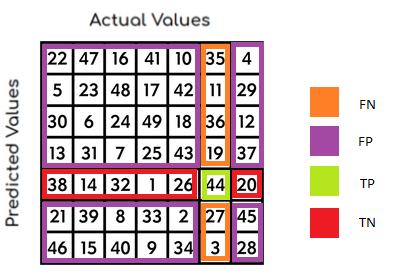

In [ ]:
def getMetrics(M,idClasse):
  TP = M[idClasse][idClasse]
  FP = sum(M[idClasse]) - TP
  FN = M.sum(axis=0)[idClasse] - TP
  TN = M.sum() - ( M.sum(axis=0)[idClasse] + M[idClasse].sum() ) + TP
  return {"TP" : TP , "FN" : FN , "FP" : FP , "TN" : TN }

- Précision
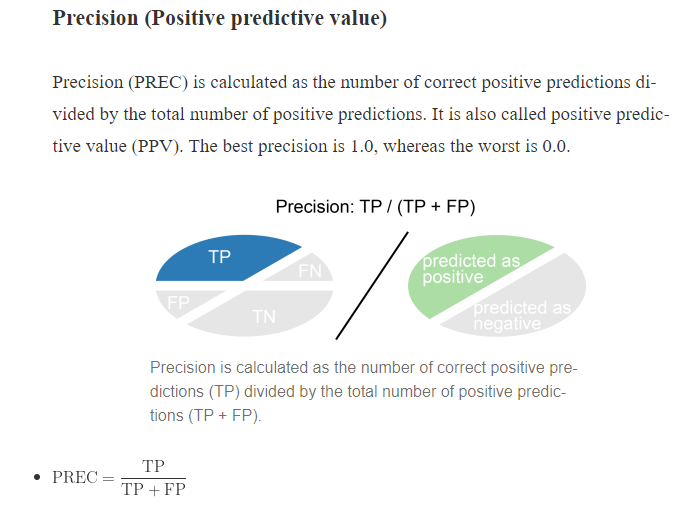

In [ ]:
# Scratch Version
def Precision(M,ClasseID):
  Metrics = getMetrics(M,ClasseID)
  TP = Metrics['TP']
  FP = Metrics['FP']
  return TP/(TP+FP)if (TP+FP)!=0 else 0



In [ ]:
#Test

print("- 2 Classes")
y_pred = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]
y_true = [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]

M1 = MatriceDeConfusion(y_true,y_pred)

print("\tScartch Version : ")
print("\t\tPrecision de la Classe 0 : {0}".format(Precision(M1,0)))
print("\t\tPrecision de la Classe 1 : {0}".format(Precision(M1,1)))
print()

# Lib Version
from sklearn.metrics import classification_report
print("\tLib Version : ")
cl_rep = classification_report(y_pred, y_true ,labels=[0, 1],output_dict=True)
print("\t\tPrecision de la Classe 0 : {0}".format(cl_rep["0"]["precision"]))
print("\t\tPrecision de la Classe 1 : {0}".format(cl_rep["1"]["precision"]))

print()

print("- 3 Classes")
y_pred = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
y_true = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]

M1 = MatriceDeConfusion(y_pred,y_true)
print("\tScartch Version : ")
print("\t\tPrecision de la Classe 0 : {0}".format(Precision(M1,0)))
print("\t\tPrecision de la Classe 1 : {0}".format(Precision(M1,1)))
print("\t\tPrecision de la Classe 2 : {0}".format(Precision(M1,2)))
print()

# Lib Version
from sklearn.metrics import classification_report
print("\tLib Version : ")
cl_rep = classification_report( y_pred, y_true , labels=[0, 1,2],output_dict=True)
print("\t\tPrecision de la Classe 0 : {0}".format(cl_rep["0"]["precision"]))
print("\t\tPrecision de la Classe 1 : {0}".format(cl_rep["1"]["precision"]))
print("\t\tPrecision de la Classe 2 : {0}".format(cl_rep["2"]["precision"]))


- 2 Classes
	Scartch Version : 
		Precision de la Classe 0 : 0.5
		Precision de la Classe 1 : 0.6666666666666666

	Lib Version : 
		Precision de la Classe 0 : 0.5
		Precision de la Classe 1 : 0.6666666666666666

- 3 Classes
	Scartch Version : 
		Precision de la Classe 0 : 1.0
		Precision de la Classe 1 : 0.3333333333333333
		Precision de la Classe 2 : 0.5

	Lib Version : 
		Precision de la Classe 0 : 0.6
		Precision de la Classe 1 : 0.5
		Precision de la Classe 2 : 0.6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """


- Taux de FP
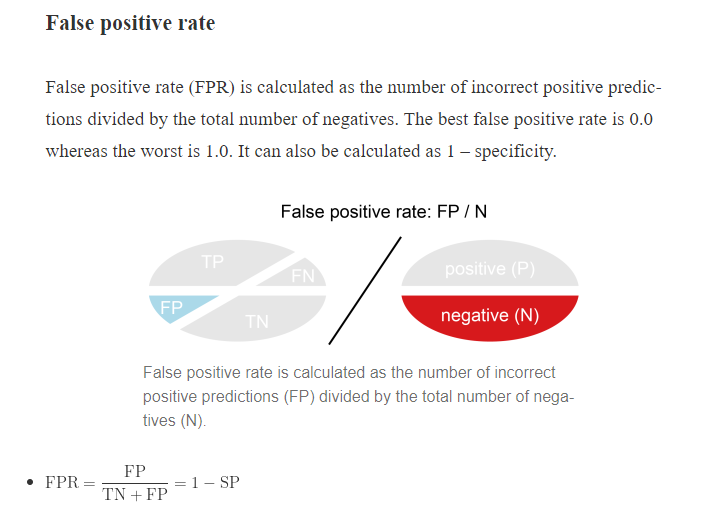

In [ ]:
# Scratch Version
def TauxdeFP(M,ClasseID):
  Metrics = getMetrics(M,ClasseID)
  TN = Metrics['TN']
  FP = Metrics['FP']
  return FP/(TN+FP)if (TN+FP)!=0 else 0

# Scratch Version
def Accurency(M,ClasseID):
  Metrics = getMetrics(M,ClasseID)
  TN = Metrics['TN']
  FP = Metrics['FP']
  TP = Metrics['TP']
  FN = Metrics['FN']

  return (TP+TN)/(TP+TN+FN+FP)if (TP+TN+FN+FP)!=0 else 0

# Scratch Version
def recall(M,ClasseID):
  Metrics = getMetrics(M,ClasseID)
  TN = Metrics['TN']
  FP = Metrics['FP']
  TP = Metrics['TP']
  FN = Metrics['FN']
  return  TP/(TP+FN)if (TP+FN)!=0 else 0


#Test
y_pred = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
y_true = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]


print("Scartch Version : ")
print("Taux de FP de la Classe 0 : {0}".format(TauxdeFP(M1,0)))
print("Taux de FP de la Classe 1 : {0}".format(TauxdeFP(M1,1)))
print("Taux de FP de la Classe 2 : {0}".format(TauxdeFP(M1,2)))
print()

Scartch Version : 
Taux de FP de la Classe 0 : 0.0
Taux de FP de la Classe 1 : 0.2
Taux de FP de la Classe 2 : 0.42857142857142855



- Spécificité
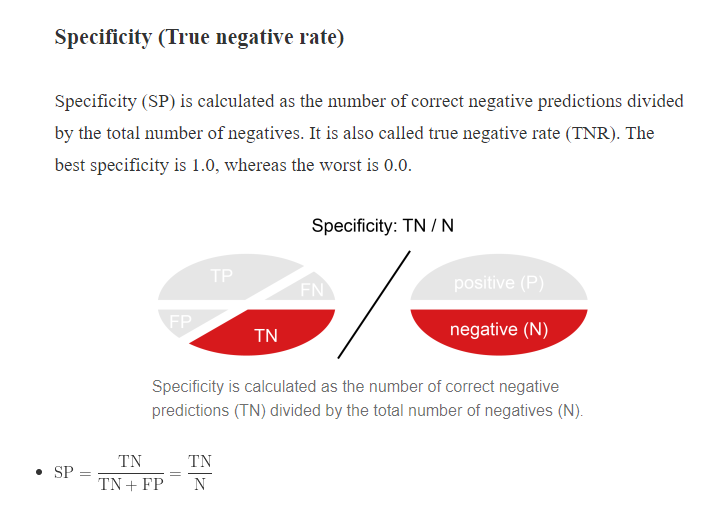

In [ ]:
# Scratch Version
def Specificite(M,ClasseID):
  Metrics = getMetrics(M,ClasseID)
  TN = Metrics['TN']
  FP = Metrics['FP']
  return TN/(TN+FP)if (TN+FP)!=0 else 0


#Test
y_pred = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
y_true = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]


print("Scartch Version : ")
print("Specificite de la Classe 0 : {0}".format(Specificite(M1,0)))
print("Specificite de la Classe 1 : {0}".format(Specificite(M1,1)))
print("Specificite de la Classe 2 : {0}".format(Specificite(M1,2)))
print()


Scartch Version : 
Specificite de la Classe 0 : 1.0
Specificite de la Classe 1 : 0.8
Specificite de la Classe 2 : 0.5714285714285714



- Courbe ROC

In [ ]:
def TPR(M,idClasse):
  Metrics = getMetrics(M,idClasse)
  TN = Metrics['TN']
  FN = Metrics['FN']
  return TN/(TN+FN)if (TN+FN)!=0 else 0

def FPR(M,idClasse):
  Metrics = getMetrics(M,idClasse)
  FP = Metrics['FP']
  TP = Metrics['TP']
  return FP/(FP+TP)if (FP+TP)!=0 else 0


def roc_binnary(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        M = MatriceDeConfusion(y_test,threshold_vector)
        tpr = TPR(M,0)
        fpr = FPR(M,0)
        roc = np.append(roc, [fpr, tpr])        
    return roc.reshape(-1, 2)

def roc_multiclasses(probabilities, y_test, idClasse,partitions=100):
  probabilities_copie = np.copy(probabilities[:,idClasse])
  y_test_copie = np.copy(y_test)
  
  y_test_copie[y_test_copie != idClasse] = -1
  y_test_copie[y_test_copie == idClasse] =  1
  y_test_copie[y_test_copie ==       -1] =  0

  roc = np.array([])
  for i in range(partitions+1):
      threshold_vector = np.greater_equal(probabilities_copie, i / partitions).astype(int)
      M = MatriceDeConfusion(y_test_copie,threshold_vector)
      tpr = TPR(M,0)
      fpr = FPR(M,0)
      roc = np.append(roc, [fpr, tpr])        
  return roc.reshape(-1, 2)

def plot_roc(ROC,title):
  fig, (ax1, ax2 , ax3 , ax4 , ax5 ) = plt.subplots(1, 5, figsize = (15,3),sharex=True, sharey=True)
  fig.suptitle(title)
  ax1.plot(ROC[0][:,0],ROC[0][:,1],color="darkorange")
  ax1.set_title("Classe 0")
  ax1.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax2.set_title("Classe 1")
  ax2.plot(ROC[1][:,0],ROC[1][:,1],color="darkorange")
  ax2.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax3.set_title("Classe 2")
  ax3.plot(ROC[2][:,0],ROC[2][:,1],color="darkorange")
  ax3.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax4.set_title("Classe 3")
  ax4.plot(ROC[3][:,0],ROC[3][:,1],color="darkorange")
  ax4.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax5.set_title("Classe 4")
  ax5.plot(ROC[4][:,0],ROC[4][:,1],color="darkorange")
  ax5.plot([0, 1], [0, 1], color="navy", linestyle="--")

  fig, (ax1, ax2 , ax3 , ax4 , ax5 ) = plt.subplots(1, 5, figsize = (15,3))


  ax1.set_title("Classe 5")
  ax1.plot(ROC[5][:,0],ROC[5][:,1],color="darkorange")
  ax1.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax2.set_title("Classe 6")
  ax2.plot(ROC[6][:,0],ROC[6][:,1],color="darkorange")
  ax2.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax3.set_title("Classe 7")
  ax3.plot(ROC[7][:,0],ROC[7][:,1],color="darkorange")
  ax3.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax4.set_title("Classe 8")
  ax4.plot(ROC[8][:,0],ROC[8][:,1],color="darkorange")
  ax4.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax5.set_title("Classe 9")
  ax5.plot(ROC[9][:,0],ROC[9][:,1],color="darkorange")
  ax5.plot([0, 1], [0, 1], color="navy", linestyle="--")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """


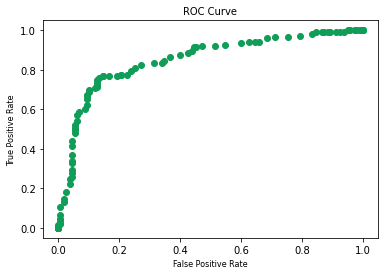

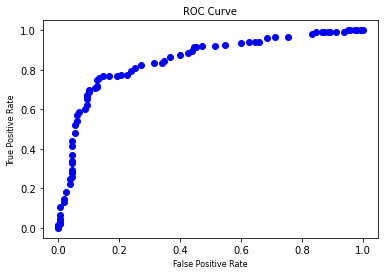

In [ ]:
#Test
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


#generation des donnees etiqueter aleatoirement
x, y = make_classification(n_samples=1000, n_informative=10, n_features=20, flip_y=0.2) 
#division du data en donnees de entainement et donnees de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#creer le model
model = RandomForestClassifier()

#entrainer le model
model.fit(X_train, y_train)

#vecteur de probabilités 
prob_vector = model.predict_proba(X_test)[:, 1]

#calculer la courbe de ROC ( 100 partition par defaut .. thVext : [0.01,0.02,..,0.99] )
ROC = roc_binnary(prob_vector,y_test)

#afficher la courbe 
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC Curve',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=8)
plt.ylabel('True Positive Rate',fontsize=8)
plt.show()


#avec la library sklearn
fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
plt.scatter(fpr,tpr,color="blue")
plt.title('ROC Curve',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=8)
plt.ylabel('True Positive Rate',fontsize=8)
plt.show()


# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [ ]:
tRatio=2/3
ttRatio=1/3

Y[Y == 10] = 0
# implementer la division
X_t, X_tt, Y_t, Y_tt = train_test_split(X, Y, test_size=1/3)

print("size of Xt  : {0}".format(X_t.shape))
print("size of Xtt : {0}".format(X_tt.shape))
print("size of Yt  : {0}".format(Y_t.shape))
print("size of Ytt : {0}".format(Y_tt.shape))

size of Xt  : (3333, 400)
size of Xtt : (1667, 400)
size of Yt  : (3333,)
size of Ytt : (1667,)


# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [ ]:
def eucledianDistance(A,B):
  s = 0
  for i in range(400):
    s = s + ((A[i]-B[i])**2)
  return (s)**(1/2)


def KNN (x_train, y_train , x_input, k):
  op_labels = []
  i = 0 
  for x in x_input: 
    print("input {0} of {1}".format(i,len(x_input)))
    point_dist = []
    for j in range(len(x_train)): 
        distances = eucledianDistance(x_train[j] , x) 
        point_dist.append(distances) 
    point_dist = np.array(point_dist) 
    dist = np.argsort(point_dist)[:k] 
    labels = y_train[dist]
    counts = np.bincount(labels)
    pre = np.argmax(counts)
    proba = (labels == pre).sum() / len(labels)
    op_labels.append([pre,proba])  
    i = i + 1
  return op_labels

import sys

def KNN_opt (x_train, y_train , x_input, k):
  op_labels = []
  nbClasses = len(set(y_train))
  cpt = 1
  for x in x_input: 
    
    if(cpt % 100 == 0):
      print("input {0} of {1}".format(cpt,len(x_input)))
    tracker = np.full((k,2), [int((sys.maxsize)**(1/2)),-1] , dtype=int)
    cpt = cpt + 1
    for j in range(len(x_train)): 
      distances = np.linalg.norm(x_train[j]-x)
      max = tracker.max(axis=0)[0]
      pos = np.where(tracker==max)[0][0]
      tracker[pos][0] = distances
      tracker[pos][1] = j
    pr = []
    for t in tracker:
      pr.append(t[1])
    labels = y_train[pr]
    
    countArr = np.zeros((nbClasses))

    for l in labels:
      countArr[l] = countArr[l]+1
    
    sum = countArr.sum()
    pre = np.where(countArr == countArr.max())[0][0]

    for i in range(len(countArr)):
      countArr[i] = countArr[i]/sum
    
    op_labels.append([pre,countArr])  
  op_labels = np.array(op_labels)
  return op_labels



In [ ]:
result3 = KNN_opt(X_t,Y_t,X_tt,3)
result4 = KNN_opt(X_t,Y_t,X_tt,4)
result5 = KNN_opt(X_t,Y_t,X_tt,5)
result6 = KNN_opt(X_t,Y_t,X_tt,6)
result7 = KNN_opt(X_t,Y_t,X_tt,7)

input 100 of 1667
input 200 of 1667
input 300 of 1667
input 400 of 1667
input 500 of 1667
input 600 of 1667
input 700 of 1667
input 800 of 1667
input 900 of 1667
input 1000 of 1667
input 1100 of 1667
input 1200 of 1667
input 1300 of 1667
input 1400 of 1667
input 1500 of 1667
input 1600 of 1667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


input 100 of 1667
input 200 of 1667
input 300 of 1667
input 400 of 1667
input 500 of 1667
input 600 of 1667
input 700 of 1667
input 800 of 1667
input 900 of 1667
input 1000 of 1667
input 1100 of 1667
input 1200 of 1667
input 1300 of 1667
input 1400 of 1667
input 1500 of 1667
input 1600 of 1667
input 100 of 1667
input 200 of 1667
input 300 of 1667
input 400 of 1667
input 500 of 1667
input 600 of 1667
input 700 of 1667
input 800 of 1667
input 900 of 1667
input 1000 of 1667
input 1100 of 1667
input 1200 of 1667
input 1300 of 1667
input 1400 of 1667
input 1500 of 1667
input 1600 of 1667
input 100 of 1667
input 200 of 1667
input 300 of 1667
input 400 of 1667
input 500 of 1667
input 600 of 1667
input 700 of 1667
input 800 of 1667
input 900 of 1667
input 1000 of 1667
input 1100 of 1667
input 1200 of 1667
input 1300 of 1667
input 1400 of 1667
input 1500 of 1667
input 1600 of 1667
input 100 of 1667
input 200 of 1667
input 300 of 1667
input 400 of 1667
input 500 of 1667
input 600 of 1667
input 7

In [ ]:
results = []
results.append(result3)
results.append(result4)
results.append(result5)
results.append(result6)
results.append(result7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """


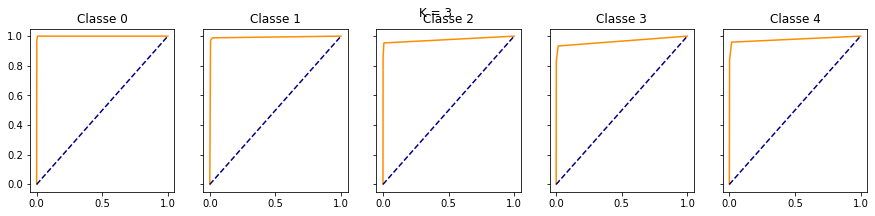

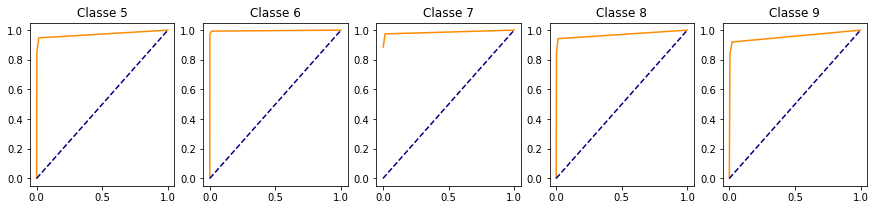

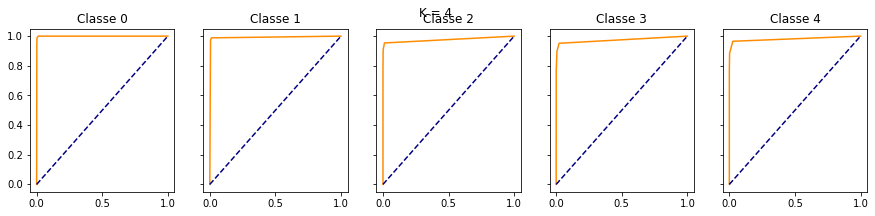

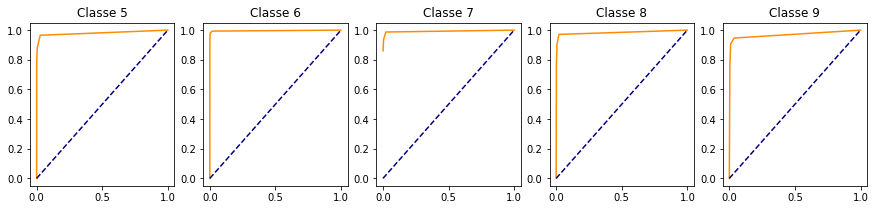

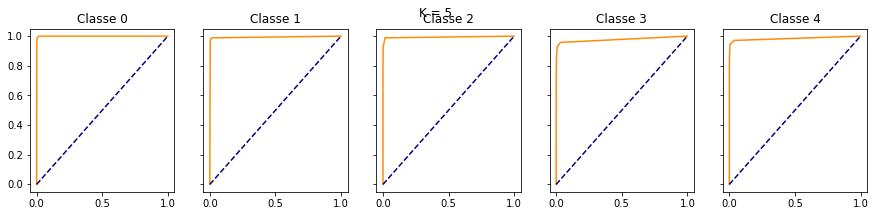

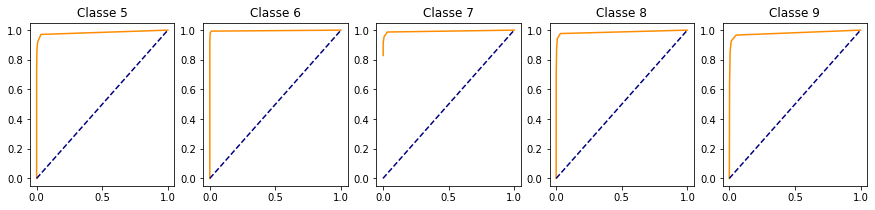

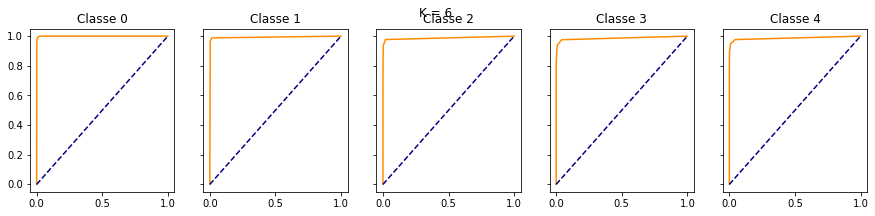

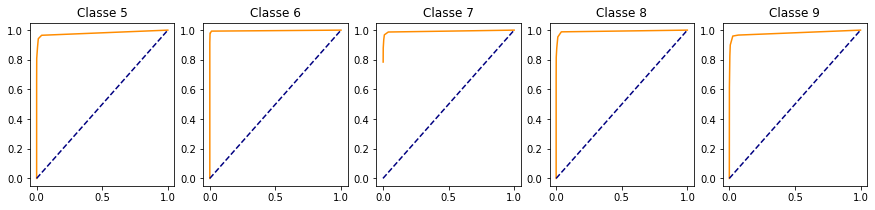

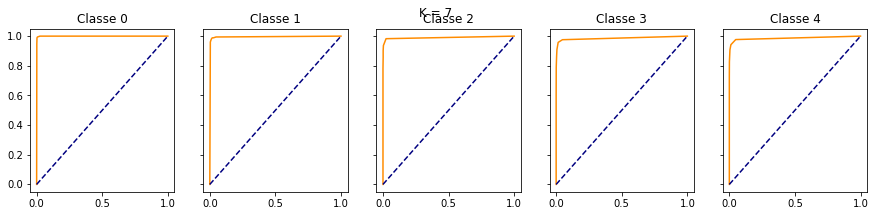

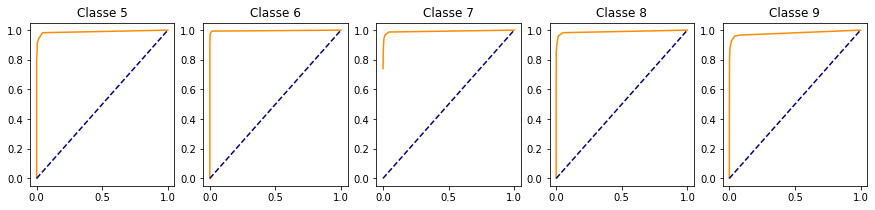

In [ ]:
def getExctract_Score(result):
  yscore = []
  for i in range(len(result)):
    listeAdded = result[:,1][i].tolist()
    yscore.append(listeAdded)
  yscore = np.array(yscore)
  return yscore

for k in range(len(results)):
  ROCs = []
  for i in range(10):
    ROC = roc_multiclasses(getExctract_Score(results[k]),Y_tt,i)
    ROCs.append(ROC)
  plot_roc(ROCs,"K = {0}".format(k+3))

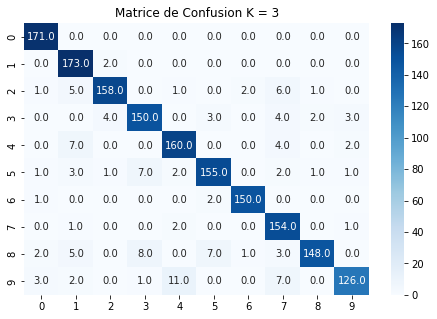

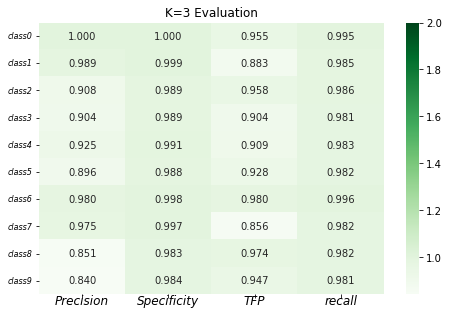

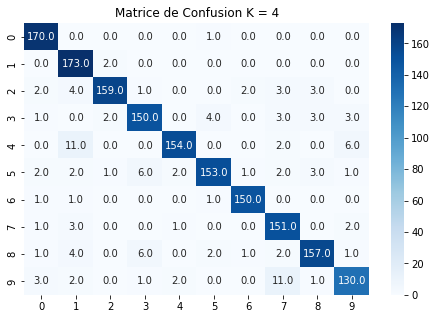

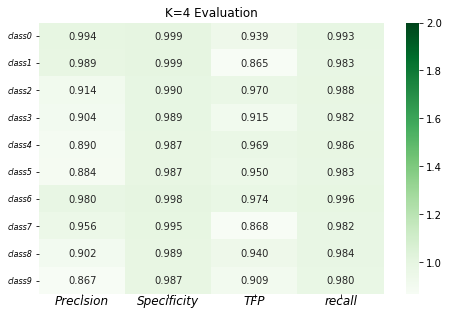

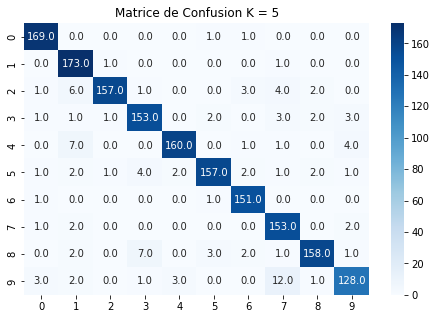

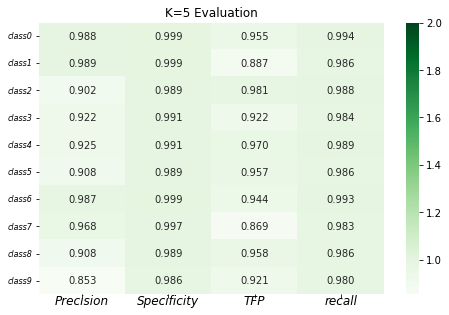

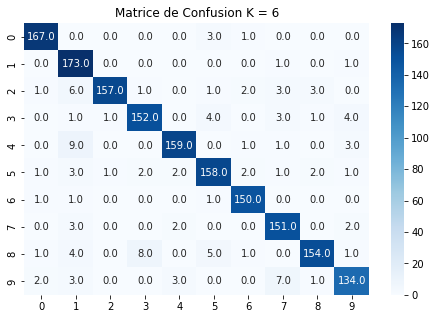

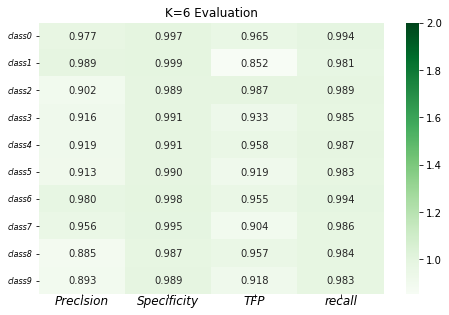

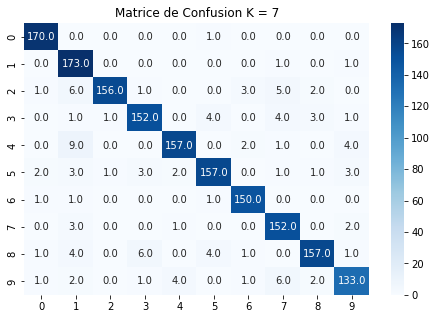

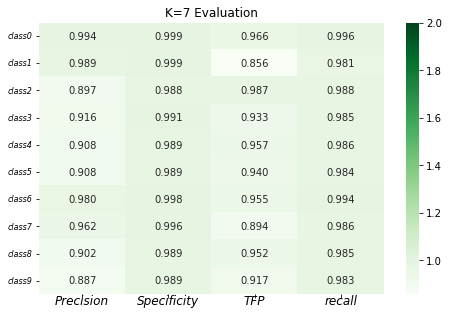

In [ ]:
import seaborn as sn

for k in range(len(results)):
  fig = plt.figure(figsize=(17,5))
  ax1=plt.subplot(121)

  MC = MatriceDeConfusion(Y_tt,(results[k][:,0]))

  sn.heatmap(MC,annot = True , cmap='Blues',fmt=".1f")
  ax1.set_title("Matrice de Confusion K = {0}".format(k+3))
  fig = plt.figure(figsize=(17,5))
  ax2=plt.subplot(122)

  Parray = np.array([Precision(MC,i) for i in range(10)])
  Sarray = np.array([Specificite(MC,i) for i in range(10)])
  rarray = np.array([recall(MC,i) for i in range(10)])
  aarray = np.array([Accurency(MC,i) for i in range(10)])
  resultClass1 = np.array([Parray,Sarray,rarray,aarray])
  resultClass1 = np.transpose(resultClass1)

  sn.heatmap(resultClass1,annot = True , cmap='Greens',fmt=".3f",vmax = 2)
  ax2.set_title("K={0} Evaluation".format(k+3))
  ax2.xaxis.set_ticklabels(['Precision', 'Specificity', 'TFP', 'recall'], color = 'black',  fontsize = 12, style = 'italic', verticalalignment = 'center') 
  ax2.yaxis.set_ticklabels(['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'],rotation = 0, color = 'black', fontsize = 8, style = 'italic', verticalalignment = 'center')
  plt.show




# Méthode 1: MVS
Machine à Vecteurs de Support

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear',probability=True) 
# entrainement 
model.fit(X_t, Y_t)
# Prediction
y_pred = model.predict(X_tt)
y_score = model.predict_proba(X_tt)

predicted calsse : 4 , with 0.998865731076345 as probability


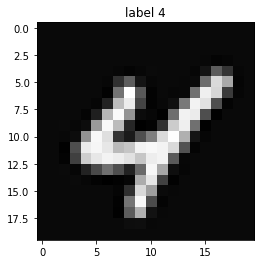

In [ ]:
# tester une image
c= 3
print("predicted calsse : {0} , with {1} as probability".format(y_pred[c],y_score[c][y_pred[c]]))
a = X_tt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_tt[c]))
plt.imshow(a,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """


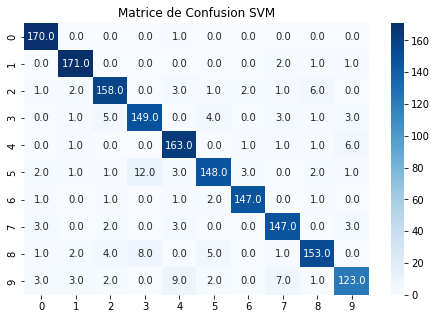

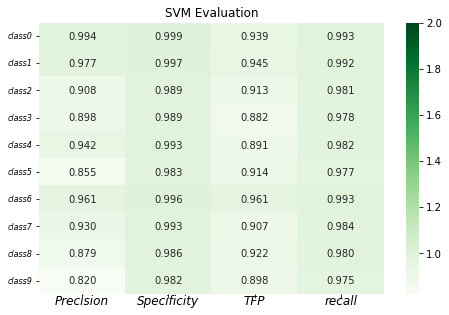

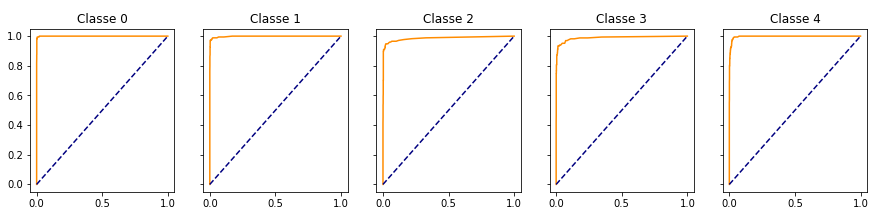

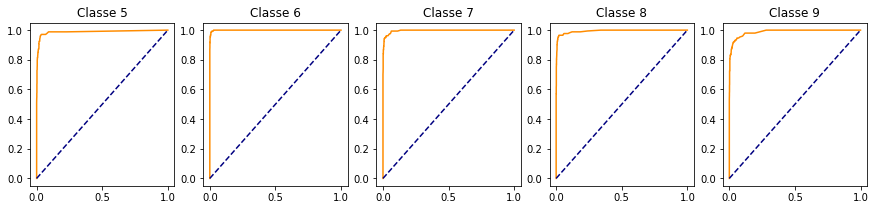

In [ ]:
MC = MatriceDeConfusion(Y_tt,y_pred)


fig = plt.figure(figsize=(17,5))
ax1=plt.subplot(121)


sn.heatmap(MC,annot = True , cmap='Blues',fmt=".1f")
ax1.set_title("Matrice de Confusion SVM")
fig = plt.figure(figsize=(17,5))
ax2=plt.subplot(122)

Parray = np.array([Precision(MC,i) for i in range(10)])
Sarray = np.array([Specificite(MC,i) for i in range(10)])
rarray = np.array([recall(MC,i) for i in range(10)])
aarray = np.array([Accurency(MC,i) for i in range(10)])
resultClass1 = np.array([Parray,Sarray,rarray,aarray])
resultClass1 = np.transpose(resultClass1)

sn.heatmap(resultClass1,annot = True , cmap='Greens',fmt=".3f",vmax = 2)
ax2.set_title("SVM Evaluation")
ax2.xaxis.set_ticklabels(['Precision', 'Specificity', 'TFP', 'recall'], color = 'black',  fontsize = 12, style = 'italic', verticalalignment = 'center') 
ax2.yaxis.set_ticklabels(['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'],rotation = 0, color = 'black', fontsize = 8, style = 'italic', verticalalignment = 'center')
plt.show

  
print()

ROCs = []
for i in range(10):
  ROC = roc_multiclasses(y_score,Y_tt,i)
  ROCs.append(ROC)
plot_roc(ROCs," ")

# Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(X_t, Y_t)
# Prediction
y_pred = model.predict(X_tt)
y_score = model.predict_proba(X_tt)

predicted calsse : 0 , with 1.0 as probability


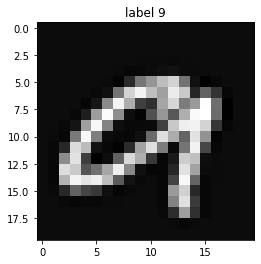

In [ ]:
# tester une image
c= 3
print("predicted calsse : {0} , with {1} as probability".format(y_pred[c],y_score[c][y_pred[c]]))
a = X_tt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_tt[c]))
plt.imshow(a,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """


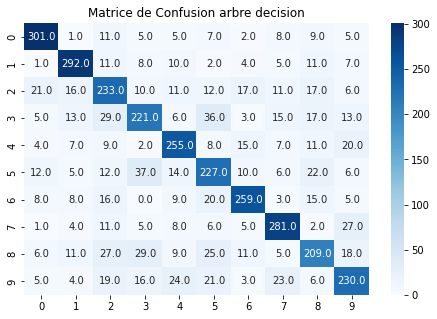

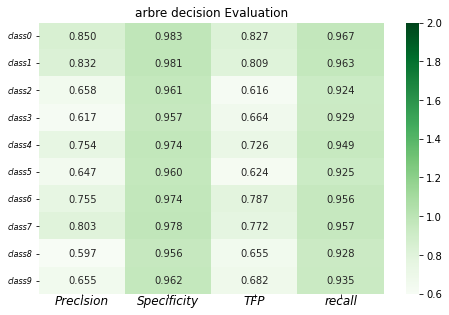

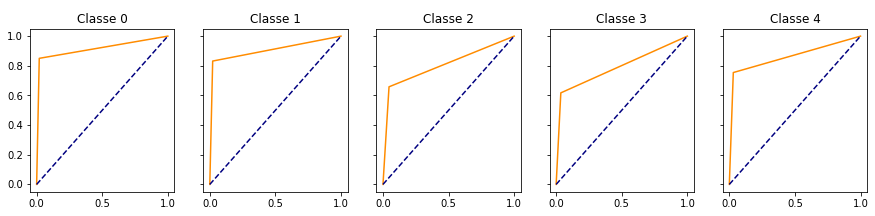

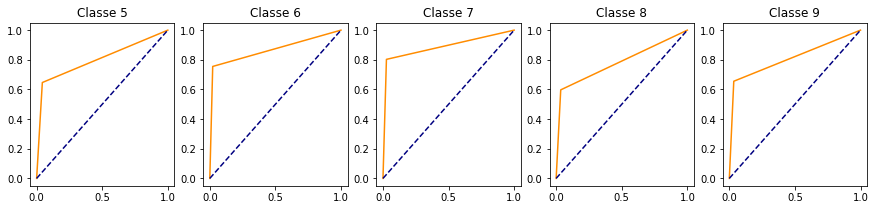

In [ ]:
MC = MatriceDeConfusion(Y_tt,y_pred)


fig = plt.figure(figsize=(17,5))
ax1=plt.subplot(121)


sn.heatmap(MC,annot = True , cmap='Blues',fmt=".1f")
ax1.set_title("Matrice de Confusion arbre decision")
fig = plt.figure(figsize=(17,5))
ax2=plt.subplot(122)

Parray = np.array([Precision(MC,i) for i in range(10)])
Sarray = np.array([Specificite(MC,i) for i in range(10)])
rarray = np.array([recall(MC,i) for i in range(10)])
aarray = np.array([Accurency(MC,i) for i in range(10)])
resultClass1 = np.array([Parray,Sarray,rarray,aarray])
resultClass1 = np.transpose(resultClass1)

sn.heatmap(resultClass1,annot = True , cmap='Greens',fmt=".3f",vmax = 2)
ax2.set_title("arbre decision Evaluation")
ax2.xaxis.set_ticklabels(['Precision', 'Specificity', 'TFP', 'recall'], color = 'black',  fontsize = 12, style = 'italic', verticalalignment = 'center') 
ax2.yaxis.set_ticklabels(['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'],rotation = 0, color = 'black', fontsize = 8, style = 'italic', verticalalignment = 'center')
plt.show

  
print()
ROCs = []
for i in range(10):
  ROC = roc_multiclasses(y_score,Y_tt,i)
  ROCs.append(ROC)
plot_roc(ROCs," ")

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
X_t, X_tt, Y_t, Y_tt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(X_t, Y_t)
# Prediction
y_pred = model.predict(X_tt)
y_score = model.predict_proba(X_tt)

predicted calsse : 5 , with 0.11272415912021017 as probability


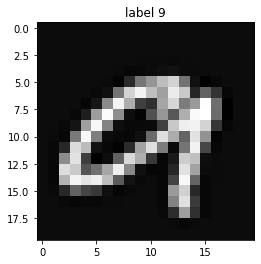

In [ ]:
# tester une image
c= 3
print("predicted calsse : {0} , with {1} as probability".format(y_pred[c],y_score[c][y_pred[c]]))
a = X_tt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_tt[c]))
plt.imshow(a,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  """


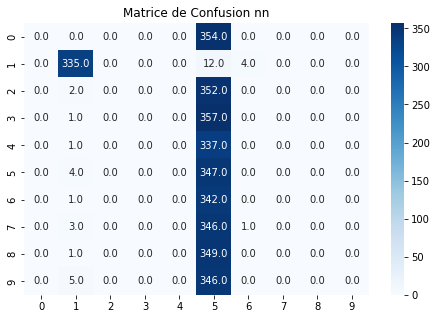

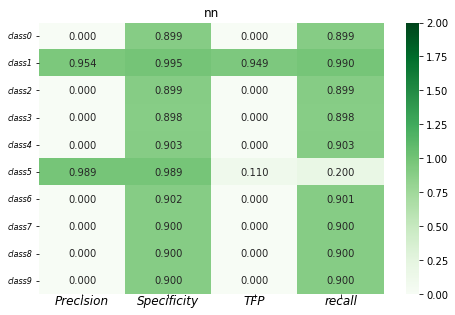

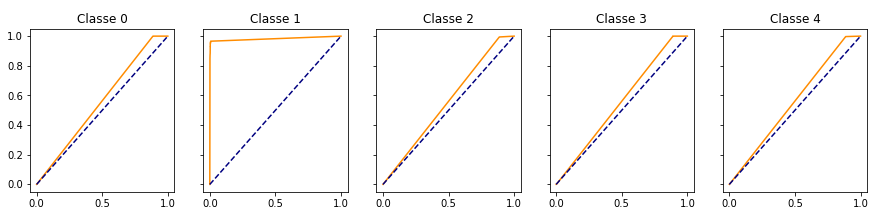

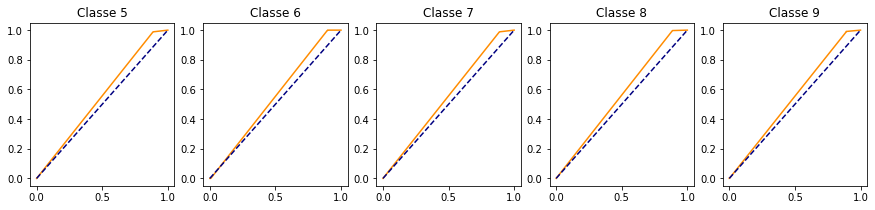

In [ ]:
MC = MatriceDeConfusion(Y_tt,y_pred)


fig = plt.figure(figsize=(17,5))
ax1=plt.subplot(121)


sn.heatmap(MC,annot = True , cmap='Blues',fmt=".1f")
ax1.set_title("Matrice de Confusion nn")
fig = plt.figure(figsize=(17,5))
ax2=plt.subplot(122)

Parray = np.array([Precision(MC,i) for i in range(10)])
Sarray = np.array([Specificite(MC,i) for i in range(10)])
rarray = np.array([recall(MC,i) for i in range(10)])
aarray = np.array([Accurency(MC,i) for i in range(10)])
resultClass1 = np.array([Parray,Sarray,rarray,aarray])
resultClass1 = np.transpose(resultClass1)

sn.heatmap(resultClass1,annot = True , cmap='Greens',fmt=".3f",vmax = 2)
ax2.set_title("nn")
ax2.xaxis.set_ticklabels(['Precision', 'Specificity', 'TFP', 'recall'], color = 'black',  fontsize = 12, style = 'italic', verticalalignment = 'center') 
ax2.yaxis.set_ticklabels(['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'],rotation = 0, color = 'black', fontsize = 8, style = 'italic', verticalalignment = 'center')
plt.show

ROCs = []
for i in range(10):
  ROC = roc_multiclasses(y_score,Y_tt,i)
  ROCs.append(ROC)
plot_roc(ROCs," ")

Afficher l'image testée

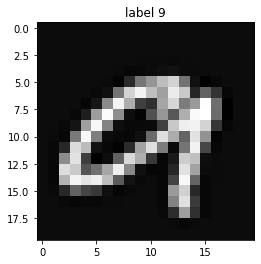

In [ ]:
a = X_tt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_tt[c]))
plt.imshow(a,cmap='gray')

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [ ]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


# Appliquer les métriques implementées pour voir le résultat

[9 6 6 ... 6 6 6]


<function matplotlib.pyplot.show>

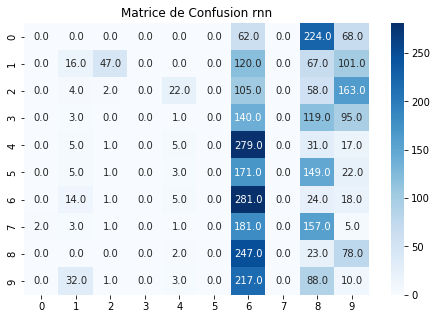

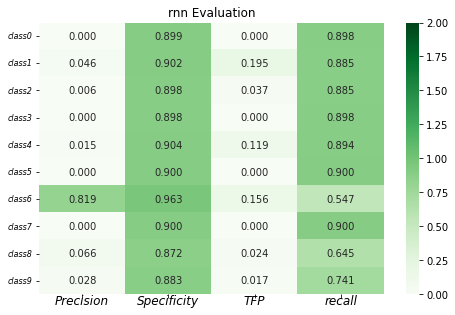

In [ ]:
# Prediction
y_pred = model.predict(Xtt_rnc)

y_pred_2 = np.zeros(shape=(len(y_pred)),dtype=np.uint8)
for i in range(len(y_pred)):
  y_pred_2[i] = int(np.where(y_pred[i] == y_pred[i].max())[0][0])

print(y_pred_2)

MC = MatriceDeConfusion(Y_tt,y_pred_2)


fig = plt.figure(figsize=(17,5))
ax1=plt.subplot(121)


sn.heatmap(MC,annot = True , cmap='Blues',fmt=".1f")
ax1.set_title("Matrice de Confusion rnn")
fig = plt.figure(figsize=(17,5))
ax2=plt.subplot(122)

Parray = np.array([Precision(MC,i) for i in range(10)])
Sarray = np.array([Specificite(MC,i) for i in range(10)])
rarray = np.array([recall(MC,i) for i in range(10)])
aarray = np.array([Accurency(MC,i) for i in range(10)])
resultClass1 = np.array([Parray,Sarray,rarray,aarray])
resultClass1 = np.transpose(resultClass1)

sn.heatmap(resultClass1,annot = True , cmap='Greens',fmt=".3f",vmax = 2)
ax2.set_title("rnn Evaluation")
ax2.xaxis.set_ticklabels(['Precision', 'Specificity', 'TFP', 'recall'], color = 'black',  fontsize = 12, style = 'italic', verticalalignment = 'center') 
ax2.yaxis.set_ticklabels(['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'],rotation = 0, color = 'black', fontsize = 8, style = 'italic', verticalalignment = 'center')
plt.show


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 4 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP

In [ ]:
# bonne chance